In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

from experanto.data import Mouse2pChunkedDataset, Mouse2pStaticImageDataset

In [2]:
class MultiEpochsDataLoader(torch.utils.data.DataLoader):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._DataLoader__initialized = False
        self.batch_sampler = _RepeatSampler(self.batch_sampler)
        self._DataLoader__initialized = True
        self.iterator = super().__iter__()

    def __len__(self):
        return len(self.batch_sampler.sampler)

    def __iter__(self):
        for i in range(len(self)):
            yield next(self.iterator)


class _RepeatSampler(object):
    """ Sampler that repeats forever.

    Args:
        sampler (Sampler)
    """

    def __init__(self, sampler):
        self.sampler = sampler

    def __iter__(self):
        while True:
            yield from iter(self.sampler)

In [12]:
1/16

0.0625

In [3]:
root_folder = "/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/"
sampling_rate = 50  # Hz
chunk_size =  250 # samples per block, i.e. context length in samples per neuron
dataset = Mouse2pChunkedDataset(root_folder=root_folder, chunk_size=chunk_size, sampling_rate=sampling_rate)

In [4]:
datapoint = dataset[0]
for k, v in datapoint.items():
    print(k, v.shape)

responses (250, 7928)
screen (250, 1, 144, 256)
eye_tracker (250, 4)
treadmill (250, 1)
timestamps (250, 7928)


In [5]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
dataloader = MultiEpochsDataLoader(dataset, 
                        batch_size=4, 
                        shuffle=True, 
                        num_workers=8, 
                        persistent_workers=True)
for b in tqdm(dataloader):
    #gpu_tensor = b["screen"].cuda()
    pass

100% 729/729 [00:36<00:00, 19.72it/s]
Process Process-4:
Process Process-7:
Process Process-1:
Process Process-6:
Process Process-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.10/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.10/multiprocessing/util.py",

In [7]:
for b in tqdm(dataloader):
    #gpu_tensor = b["screen"].cuda()
    pass

100% 729/729 [00:35<00:00, 20.63it/s]


In [7]:
46*80*16

58880

In [8]:
58880/9

6542.222222222223

# Speed Comparison

In [3]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
dataloader = DataLoader(dataset, 
                        batch_size=8, 
                        shuffle=True, 
                        num_workers=0)
for b in tqdm(dataloader):
    gpu_tensor = b["screen"].cuda()

 21% 47/228 [00:32<02:05,  1.44it/s]

KeyboardInterrupt



# Ethans data

In [80]:
root_folder = "/data/livingstone_2024/first_try/livingstone_small_v1/Lo200429/"
sampling_rate = 40  # Hz
chunk_size = 200 # samples per block, i.e. context length in samples per neuron
dataset = Mouse2pChunkedDataset(root_folder=root_folder, chunk_size=chunk_size, sampling_rate=sampling_rate)

In [81]:
datapoint = dataset[0]
for k, v in datapoint.items():
    print(k, v.shape)

responses (200, 74)
screen (200, 1, 192, 256)
eye_tracker (200, 2)
timestamps (200, 74)


In [82]:
len(dataset)

132

In [83]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
dataloader = MultiEpochsDataLoader(dataset, 
                        batch_size=16, 
                        shuffle=False, 
                        num_workers=16, 
                                   persistent_workers=True)
all_batches = []
for b in tqdm(dataloader):
    all_batches.append(b)
    gpu_tensor = b["screen"].cuda()

100% 9/9 [00:01<00:00,  4.67it/s]


In [86]:
for b in tqdm(dataloader):
    all_batches.append(b)
    gpu_tensor = b["screen"].cuda()

100% 9/9 [00:01<00:00,  5.58it/s]


In [77]:
all_batches[0]["screen"].shape

torch.Size([16, 150, 1, 192, 256])

In [79]:
gpu_tensor.shape

torch.Size([4, 150, 1, 192, 256])

In [78]:
150*16*9

21600

In [72]:
b["screen"].shape

torch.Size([4, 150, 1, 192, 256])

In [89]:
screen = all_batches[0]["screen"][2].numpy()

In [90]:
screen.shape

(200, 1, 192, 256)

In [102]:
np.unique(screen, axis=0, return_index=True)

(array([[[[100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          ...,
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.]]],
 
 
        [[[100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          ...,
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.]]],
 
 
        [[[100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          ...,
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 10

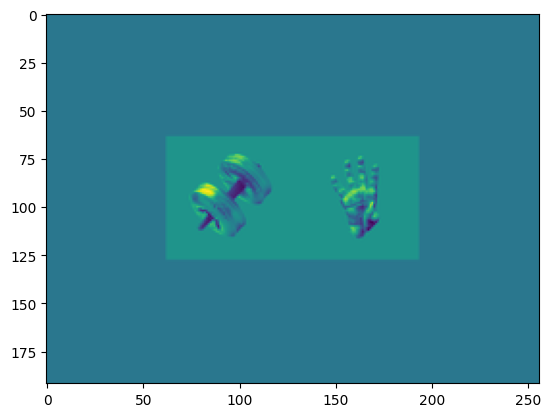

In [99]:
plt.imshow(np.unique(screen, axis=0)[1].squeeze())

In [121]:
i

73

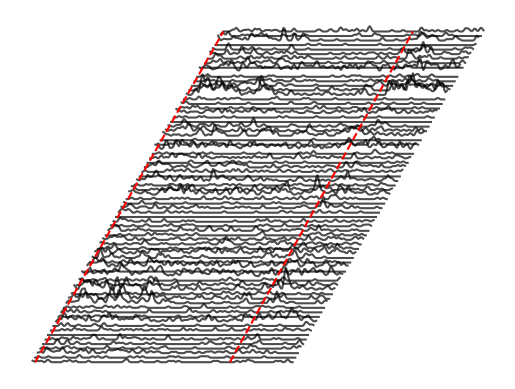

In [127]:
rsps = all_batches[0]["responses"][2].numpy()
for i, r in enumerate(rsps.T):
    plt.plot(np.arange(len(r))+i*2, r+i/20, 'k', alpha=.7)
    plt.axis("off")

plt.plot([2, i*2], [0, i/20], 'r--')
plt.plot([151, 145+i*2], [0, i/20], 'r--')
#plt.plot(np.arange(len(r))+i*2+2, rsps.T.mean(0)*20 + i/20+.2, 'k')
#plt.plot(np.arange(len(r))+i*2+2, rsps.T.mean(0)*0 + i/20+.2, 'k--', alpha=.1)

In [112]:
i

73

In [100]:
eye = all_batches[0]["eye_tracker"][2].numpy()

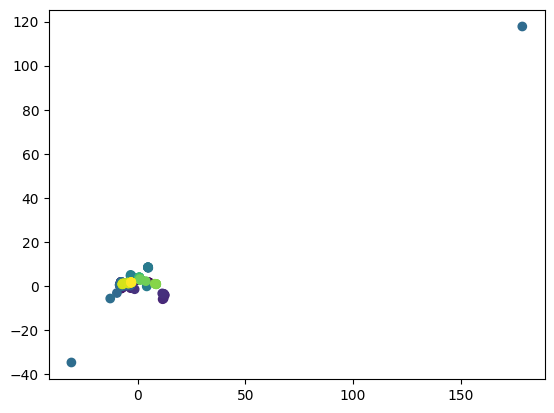

In [101]:
plt.scatter(*eye.T, c=range(len(eye)))

# multidataloader

In [3]:
root_folder = "/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/"
sampling_rate = 30  # Hz
chunk_size =  150 # samples per block, i.e. context length in samples per neuron
dataset = Mouse2pChunkedDataset(root_folder=root_folder, chunk_size=chunk_size, sampling_rate=sampling_rate)

In [4]:
datapoint = dataset[0]
for k, v in datapoint.items():
    print(k, v.shape)

responses (150, 7928)
screen (150, 1, 144, 256)
eye_tracker (150, 4)
treadmill (150, 1)
timestamps (150, 7928)


In [5]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
dataloader = MultiEpochsDataLoader(dataset, 
                        batch_size=4,
                        prefetch_factor=2,
                        shuffle=True, 
                        num_workers=8, 
                        persistent_workers=True)
for b in tqdm(dataloader):
    #gpu_tensor = b["screen"].cuda()
    pass

100% 365/365 [00:22<00:00, 15.92it/s]
Process Process-5:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.10/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 199, in _finalize_join
    thread.join()
  File "/usr/lib/python3.10/threading.py", line 1096, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.10/threading.py", line 1116, in _wait_for_tstate_lock
    if lock.acquire(block, timeout):
KeyboardInterrupt
Process Process-3:
Traceback (most recent call last):


In [ ]:
for i, (k, b) in tqdm(enumerate(LongCycler(dls))):
    pass

2832it [02:29, 18.95it/s]
Exception ignored in: <generator object cycle at 0x7f58844cde00>
Traceback (most recent call last):
  File "/tmp/ipykernel_305883/3810137171.py", line 14, in cycle
KeyboardInterrupt: 
Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/signal_handling.py", line 73, in handler
    _error_if_any_worker_fails()
RuntimeError: DataLoader worker (pid 319648) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f5c1d57b340>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
  File "/usr/local/lib/p

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_305883/1735984976.py", line 2, in <module>
    pass
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1457, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1348, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1195, in structured_traceback
    formatted_exception = self

### imports